In [1]:
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import torchvision.transforms.functional as TF
import shutil
import math
from torch.utils.data import DataLoader
import torch.utils.data as data
from datetime import datetime
import torch
import torch.nn as nn
import torch.optim as optim

#Images

In [2]:
!git clone https://github.com/BorgwardtLab/covid19_ultrasound.git
!cd covid19_ultrasound/pocovidnet/
!pip install -e .

Cloning into 'covid19_ultrasound'...
remote: Enumerating objects: 4531, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 4531 (delta 37), reused 29 (delta 10), pack-reused 4453
Receiving objects: 100% (4531/4531), 165.49 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (369/369), done.
Updating files: 100% (3873/3873), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
#copy data folder for further work
!cp -r /content/covid19_ultrasound/data /content/

In [4]:
#check how many files are in each folder (images or video files)
!ls -1 /content/data/pocus_images/convex | wc -l
!ls -1 /content/data/pocus_images/linear | wc -l
!ls -1 /content/data/pocus_videos/convex | wc -l
!ls -1 /content/data/pocus_videos/linear | wc -l

29
3
124
11


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Get the files used by the authors of the dataset, with some modifications (mostly path fixes)
file_names = ['crop.json', 'crop_processed_data.py', 'get_and_process_web_data.sh', 'build_image_dataset.py', 'cross_val_splitter.py']

# define source and destination path
source_folder = '/content/drive/MyDrive/Bakis'
destination_folder = '/content/'

# Copy the files
for file_name in file_names:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    if os.path.isfile(source_path):
        shutil.copy(source_path, destination_path)

In [8]:
#Files from web
!cd covid19_ultrasound/data
!sh /content/get_and_process_web_data.sh

youtube-dl could not be found, installing now..
--2024-05-21 20:41:46--  https://yt-dl.org/downloads/latest/youtube-dl
Resolving yt-dl.org (yt-dl.org)... 95.143.172.170, 2001:1a50:11:0:5f:8f:acaa:177
Connecting to yt-dl.org (yt-dl.org)|95.143.172.170|:443... connected.
HTTP request sent, awaiting response... 451 Unavailable For Legal Reasons
2024-05-21 20:41:48 ERROR 451: Unavailable For Legal Reasons.

Grabbing data now..
--2024-05-21 20:41:48--  https://clarius.com/wp-content/uploads/2020/03/1-blines.gif
Resolving clarius.com (clarius.com)... 104.26.8.204, 104.26.9.204, 172.67.72.226, ...
Connecting to clarius.com (clarius.com)|104.26.8.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10635005 (10M) [image/gif]
Saving to: ‘tmp/pocus_videos/convex/Cov-clarius.gif’

tmp/pocus_videos/co 100%[===================>]  10.14M  7.85MB/s    in 1.3s    

2024-05-21 20:41:50 (7.85 MB/s) - ‘tmp/pocus_videos/convex/Cov-clarius.gif’ saved [10635005/10635005]

--2024-05-

In [9]:
#how many files we get from web
!ls -1 /content/tmp/pocus_images/convex | wc -l
!ls -1 /content/tmp/pocus_images/linear | wc -l
!ls -1 /content/tmp/pocus_videos/convex | wc -l
!ls -1 /content/tmp/pocus_videos/linear | wc -l

31
4
41
9


In [10]:
#crop web files and put into data folder
!python3 /content/crop_processed_data.py

pocus_videos/convex/Reg-nephropocus.gif [[25, 90, 250], [0, 30.0]]
(30, 250, 250, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Reg-Youtube.mp4 [[40, 150, 280], [2299, 2429]]
Problem reading file: tmp/pocus_videos/convex/Reg-Youtube.mp4
pocus_videos/convex/pneu-everyday.gif [[30, 90, 340], [0, 61.0]]
(61, 340, 340, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Cov-clarius.gif [[30, 100, 350], [0, 103.0]]
(103, 350, 350, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Reg-bcpocus.gif [[0, 100, 400], [0, 59.0]]
(59, 400, 400, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is

In [11]:
# check if new files appear in the folders
!ls -1 /content/data/pocus_images/convex | wc -l
!ls -1 /content/data/pocus_images/linear | wc -l
!ls -1 /content/data/pocus_videos/convex | wc -l
!ls -1 /content/data/pocus_videos/linear | wc -l

53
6
155
18


In [12]:
#temp delete
#!rm -rf tmp

In [13]:
#crop videos files, images, put into image_dataset folder
!python3 /content/build_image_dataset.py

Reg_Image_181602_trimmed_crop.mp4 framerate 29.03790956871808 width 386.0 height 386.0 number frames: 374.0
--> taking every  9 th image
Pneu_northumbria_0409_set1_vid2.avi framerate 22.25 width 520.0 height 520.0 number frames: 93.0
--> taking every  7 th image
Cov-grep-7525.mp4 framerate 20.833 width 400.0 height 400.0 number frames: 361.0
--> taking every  6 th image
Cov_denault_proposedUS_vid11.mov framerate 60.0 width 852.0 height 852.0 number frames: 143.0
--> taking every  20 th image
Reg_Avi_lung-sliding.MP4 framerate 18.0 width 528.0 height 528.0 number frames: 56.0
--> taking every  6 th image
Pneu_northumbria_0409_set2_vid3.avi framerate 22.25 width 503.0 height 503.0 number frames: 92.0
--> taking every  7 th image
Cov_denault_proposedUS_vid5.mov framerate 60.0 width 706.0 height 706.0 number frames: 210.0
--> taking every  20 th image
Reg-Grep-Normal.mp4 framerate 10.0 width 400.0 height 400.0 number frames: 33.0
--> taking every  3 th image
Pneu_northumbria_0409_set6_vid5

In [14]:
#check how many files we have (here are the images, no video files left)
!ls -1 /content/image_dataset/covid | wc -l
!ls -1 /content/image_dataset/pneumonia | wc -l
!ls -1 /content/image_dataset/regular | wc -l

918
726
1380


In [15]:
#create splits for 5 fold cross validation
#for another method in "make folders to be ready for train and test"
#!python3 /content/cross_val_splitter.py --splits 5

#Make folders to be ready for train and test

**Using POCUS cropped images (image-dataset)**

Making folders fold0 - fold5, where each folder has test, validation and train folders.

First, we let kfold divide the data into 5 splits, which contain train and test data. Then we take a part of the train data, which we will use for validation (for early stopping)

In [16]:
import os
import shutil
from sklearn.model_selection import KFold, train_test_split
import numpy as np

data_dir = '/content/image_dataset'
classes = ['covid', 'pneumonia', 'regular']

data = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        data.append(os.path.join(class_dir, image_name))
        labels.append(class_name)

data = np.array(data)
labels = np.array(labels)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
split_dir = os.path.join(data_dir, 'splits')
os.makedirs(split_dir, exist_ok=True)

for fold, (train_idx, test_idx) in enumerate(kf.split(data)):
    fold_dir = os.path.join(split_dir, f'fold_{fold}')
    os.makedirs(fold_dir, exist_ok=True)

    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')
    test_dir = os.path.join(fold_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    train_data, val_data = train_test_split(train_idx, test_size=0.2, random_state=42)

    for idx in train_data:
        class_name = labels[idx]
        dest_folder = os.path.join(train_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)

    for idx in val_data:
        class_name = labels[idx]
        dest_folder = os.path.join(val_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)

    for idx in test_idx:
        class_name = labels[idx]
        dest_folder = os.path.join(test_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)


In [17]:
import os

def count_files(directory):
    """Funkcija skaičiuoja failus kiekvienoje direktorijoje ir jos subdirektorijose."""
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

data_dir = '/content/image_dataset/splits'  # Čia nurodykite savo splits katalogą

# Eiti per kiekvieną fold direktoriją
for fold in os.listdir(data_dir):
    fold_dir = os.path.join(data_dir, fold)
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')
    test_dir = os.path.join(fold_dir, 'test')

    # Skaičiuojame failus kiekvienoje direktorijoje
    train_count = count_files(train_dir)
    val_count = count_files(val_dir)
    test_count = count_files(test_dir)

    print(f'{fold}:')
    print(f'  Training data: {train_count} files')
    print(f'  Validation data: {val_count} files')
    print(f'  Testing data: {test_count} files')


fold_0:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_2:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_1:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_3:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_4:
  Training data: 1936 files
  Validation data: 484 files
  Testing data: 604 files


**Using POCUS cross validation splits**
(old method)

Making folders fold0 - fold5, where each folder has test and train folders.

In each fold, it will combine previous splits images (what are in cross_validation folder) as indicated:

fold0:  
*   test -> images from folder split0;
*   train -> images from folders split1-4

other folders are generated in the same way

In [18]:
# import os

# base_dir = "/content/"
# crossval_dir = os.path.join(base_dir, "mySplits")

# # Base folders
# for i in range(0, 5):
#     fold_dir = os.path.join(crossval_dir, f"fold{i}")
#     train_dir = os.path.join(fold_dir, "train")
#     test_dir = os.path.join(fold_dir, "test")

#     # test and train folders
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)

#     # classes folders
#     for class_name in ['covid', 'pneumonia', 'regular']:
#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)


In [19]:
# classes_names = ['covid', 'pneumonia', 'regular']  # classes names

# src_dir = '/content/cross_validation/'
# dest_dir = '/content/mySplits/'

# for i in range(0, 5):
#     test_index = i  # Test split
#     train_indices = [j for j in range(0, 5) if j != i]  # The remaining splits will be used for training
#     print(test_index)
#     print(train_indices)

#     # Copy test images
#     for cls in classes_names:
#         src_folder = os.path.join(src_dir, f"split{test_index}", cls)
#         dst_folder = os.path.join(dest_dir, f"fold{i}", "test", cls)

#         for filename in os.listdir(src_folder):
#             src_file = os.path.join(src_folder, filename)
#             dst_file = os.path.join(dst_folder, filename)
#             shutil.copy(src_file, dst_file)

#     # Copy train images
#     for train_index in train_indices:
#         for cls in classes_names:
#             src_folder = os.path.join(src_dir, f"split{train_index}", cls)
#             dst_folder = os.path.join(dest_dir, f"fold{i}", "train", cls)
#             for filename in os.listdir(src_folder):
#                 src_file = os.path.join(src_folder, filename)
#                 dst_file = os.path.join(dst_folder, filename)
#                 shutil.copy(src_file, dst_file)


#Trying and evaluating with Keras


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping


In [21]:
# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip
    brightness_range=[0.8,1.2],  # Adjust brightness
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


# Specify image dimensions, batch size
img_height = 224
img_width = 224
batch_size = 32

In [22]:
#functions
# Plot the training graph
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Training accuracy in red
    plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
    # Validation accuracy in blue
    plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
    plt.title('Treniravimo ir validacijos tikslumas')
    plt.legend()

    plt.figure()

    # Training loss in red
    plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
    # Validation loss in blue
    plt.plot(epochs, val_loss, 'b-', label='Validacijos nuostoliai', color='blue')
    plt.title('Treniravimo ir validacijos nuostoliai')
    plt.legend()

    plt.show()

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

## Cross entropy + sgd + 0.01

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
16705208/16705208 [==============================] - 0s 0us/step
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 54s 607ms/step - loss: 0.8630 - accuracy: 0.6274 - auc: 0.8084 - val_loss: 0.5952 - val_accuracy: 0.7665 - val_auc: 0.9160
Epoch 2/30
61/61 [==============================] - 38s 624ms/step - loss: 0.5760 - accuracy: 0.7685 - auc: 0.9156 - val_loss: 0.6499 - val_accuracy: 0.7004 - val_auc: 0.8933
Epoch 3/30
61/61 [==============================] - 36s 585ms/step - loss: 0.4680 - accuracy: 0.8165 - auc: 0.9414 - val_loss: 0.3943 - val_accuracy: 0.8492 - val_auc: 0.9591
Epoch 4/30
61/61 [==============================] - 35s 575ms/step - loss: 0.4064 - accuracy: 0.839

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

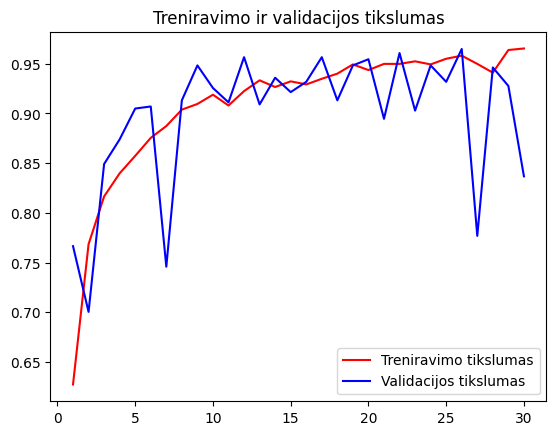

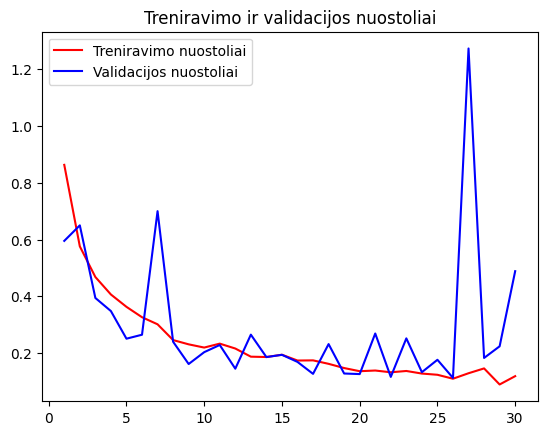

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_0.h5


<ipython-input-22-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 6s 212ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.66      0.98      0.79       203
   pneumonia       0.99      0.65      0.78       139
     regular       0.95      0.78      0.86       263

    accuracy                           0.81       605
   macro avg       0.87      0.80      0.81       605
weighted avg       0.86      0.81      0.82       605

Accuracy: 0.8148760330578513
Specificity for covid: 0.75
Specificity for pneumonia: 1.00
Specificity for regular: 0.97
Macro-average Specificity: 0.91


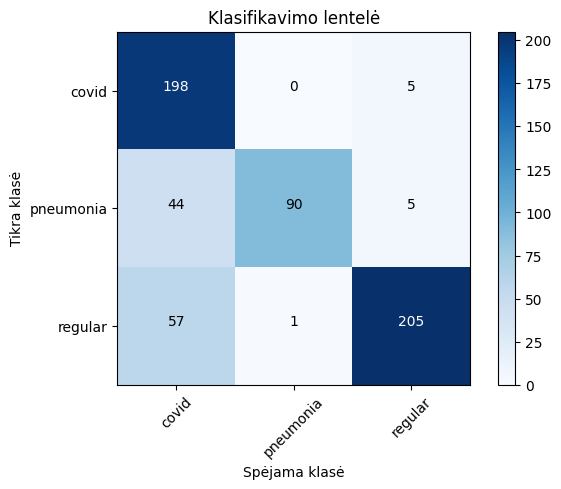

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 46s 567ms/step - loss: 0.8659 - accuracy: 0.6217 - auc_1: 0.8077 - val_loss: 0.8036 - val_accuracy: 0.5723 - val_auc_1: 0.8159
Epoch 2/30
61/61 [==============================] - 36s 585ms/step - loss: 0.5645 - accuracy: 0.7855 - auc_1: 0.9201 - val_loss: 0.6046 - val_accuracy: 0.7376 - val_auc_1: 0.9036
Epoch 3/30
61/61 [==============================] - 36s 587ms/step - loss: 0.4614 - accuracy: 0.8129 - auc_1: 0.9443 - val_loss: 0.5248 - val_accuracy: 0.7789 - val_auc_1: 0.9286
Epoch 4/30
61/61 [==============================] - 35s 565ms/step - loss: 0.3903 - accuracy: 0.8336 - auc_1: 0.9591 - val_loss: 0.3582 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

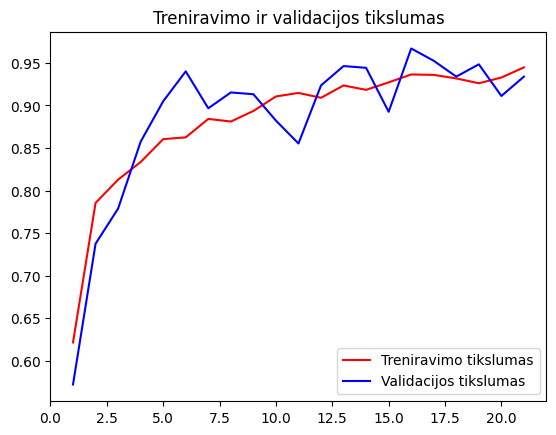

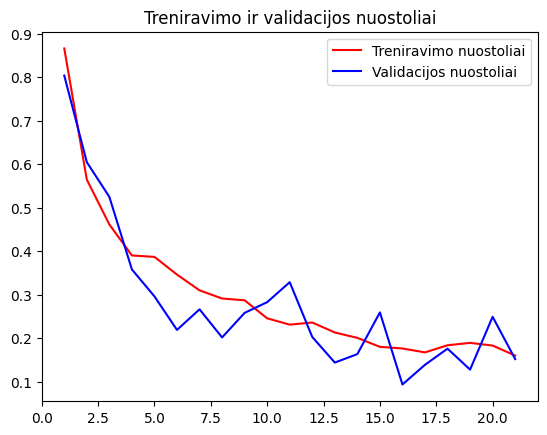

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_1.h5


<ipython-input-22-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 110ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.98      0.94      0.96       175
   pneumonia       0.96      0.96      0.96       152
     regular       0.95      0.97      0.96       278

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9619834710743802
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.96
Macro-average Specificity: 0.98


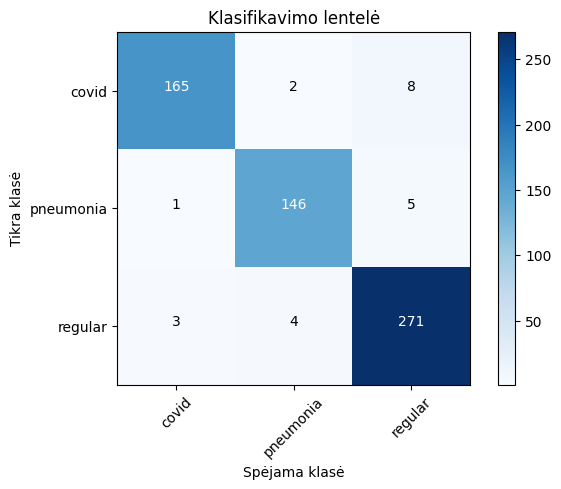

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 47s 567ms/step - loss: 0.8431 - accuracy: 0.6222 - auc_2: 0.8141 - val_loss: 0.8234 - val_accuracy: 0.6550 - val_auc_2: 0.8386
Epoch 2/30
61/61 [==============================] - 36s 583ms/step - loss: 0.5409 - accuracy: 0.7917 - auc_2: 0.9267 - val_loss: 0.9257 - val_accuracy: 0.6281 - val_auc_2: 0.8355
Epoch 3/30
61/61 [==============================] - 34s 559ms/step - loss: 0.4329 - accuracy: 0.8315 - auc_2: 0.9491 - val_loss: 0.5728 - val_accuracy: 0.7624 - val_auc_2: 0.9182
Epoch 4/30
61/61 [==============================] - 36s 588ms/step - loss: 0.3660 - accuracy: 0.8558 - auc_2: 0.9622 - val_loss: 0.5180 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

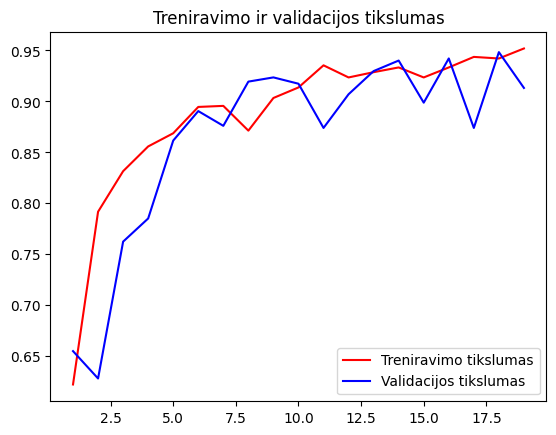

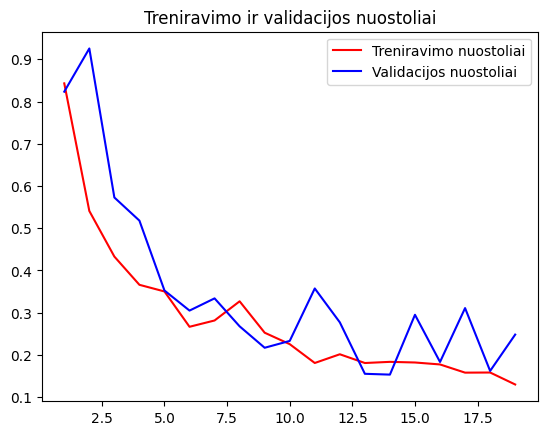

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_2.h5


<ipython-input-22-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 106ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.97      0.89      0.93       180
   pneumonia       0.94      0.96      0.95       136
     regular       0.93      0.97      0.95       289

    accuracy                           0.94       605
   macro avg       0.95      0.94      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.943801652892562
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.94
Macro-average Specificity: 0.97


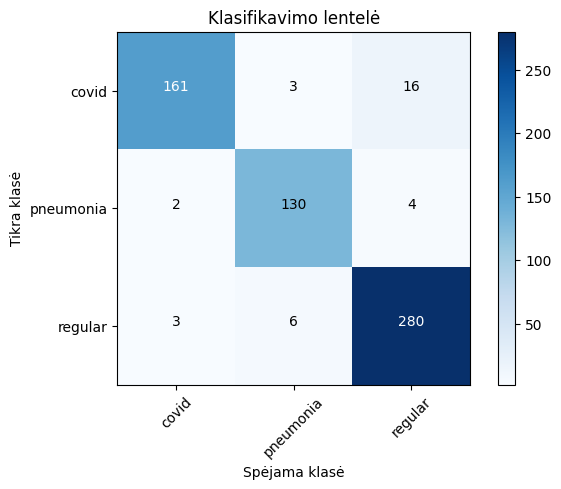

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 47s 572ms/step - loss: 0.8482 - accuracy: 0.6382 - auc_3: 0.8165 - val_loss: 1.0408 - val_accuracy: 0.5083 - val_auc_3: 0.7339
Epoch 2/30
61/61 [==============================] - 35s 577ms/step - loss: 0.5841 - accuracy: 0.7685 - auc_3: 0.9119 - val_loss: 0.8804 - val_accuracy: 0.5930 - val_auc_3: 0.8326
Epoch 3/30
61/61 [==============================] - 35s 564ms/step - loss: 0.4985 - accuracy: 0.8047 - auc_3: 0.9362 - val_loss: 0.4905 - val_accuracy: 0.8058 - val_auc_3: 0.9371
Epoch 4/30
61/61 [==============================] - 35s 569ms/step - loss: 0.4456 - accuracy: 0.8331 - auc_3: 0.9459 - val_loss: 0.6156 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

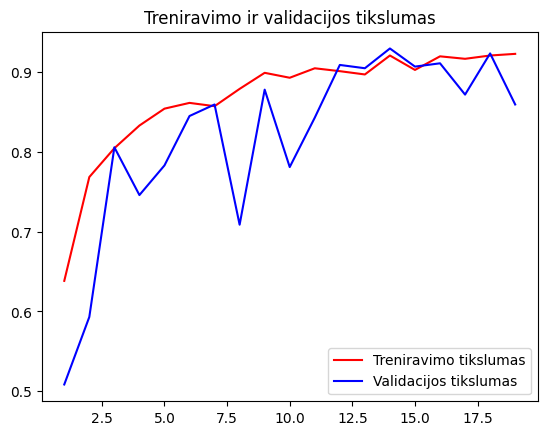

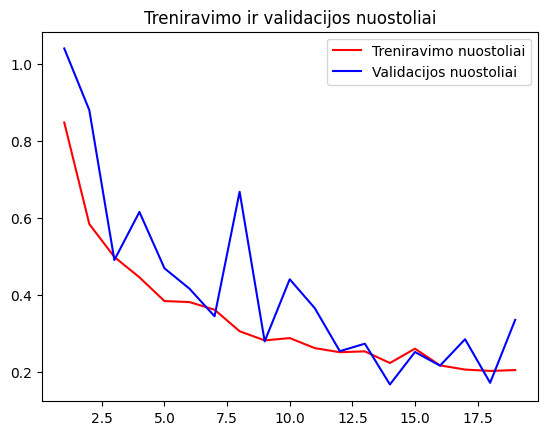

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_3.h5


<ipython-input-22-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 82ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.87      0.93       187
   pneumonia       0.95      0.87      0.91       145
     regular       0.87      0.99      0.93       273

    accuracy                           0.92       605
   macro avg       0.94      0.91      0.92       605
weighted avg       0.93      0.92      0.92       605

Accuracy: 0.9239669421487603
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.88
Macro-average Specificity: 0.96


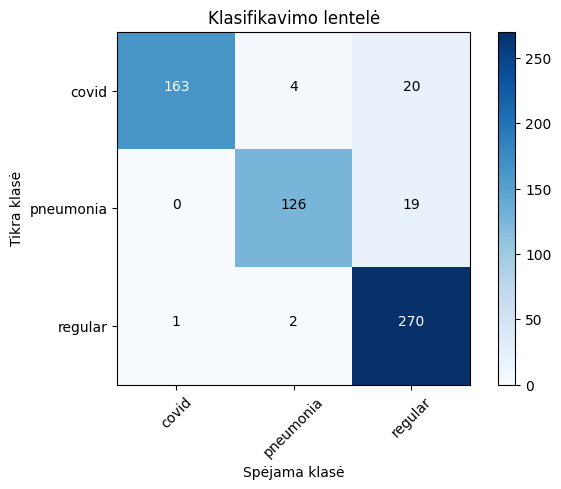

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 46s 576ms/step - loss: 0.8554 - accuracy: 0.6364 - auc_4: 0.8132 - val_loss: 1.0619 - val_accuracy: 0.5599 - val_auc_4: 0.8009
Epoch 2/30
61/61 [==============================] - 34s 557ms/step - loss: 0.6440 - accuracy: 0.7505 - auc_4: 0.8959 - val_loss: 0.8075 - val_accuracy: 0.6488 - val_auc_4: 0.8415
Epoch 3/30
61/61 [==============================] - 37s 599ms/step - loss: 0.4737 - accuracy: 0.8218 - auc_4: 0.9423 - val_loss: 0.4266 - val_accuracy: 0.8430 - val_auc_4: 0.9525
Epoch 4/30
61/61 [==============================] - 35s 570ms/step - loss: 0.4392 - accuracy: 0.8378 - auc_4: 0.9484 - val_loss: 0.3257 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

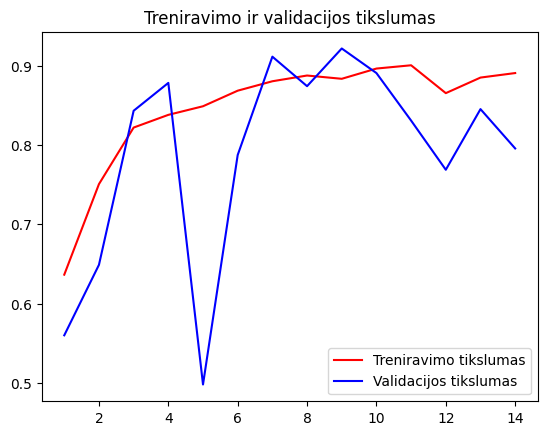

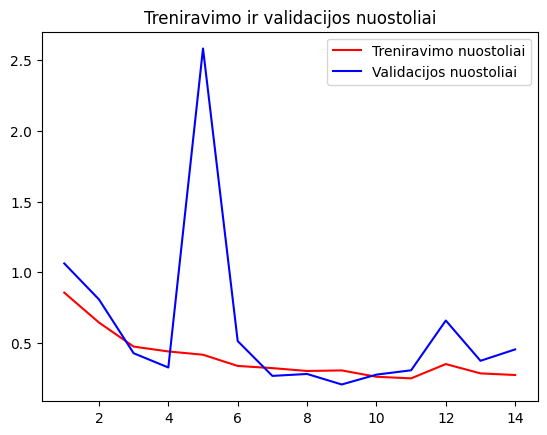

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_4.h5


<ipython-input-22-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


 8/19 [===========>..................] - ETA: 0s

In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.01, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross entropy + sgd + 0.001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
16705208/16705208 [==============================] - 2s 0us/step
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 59s 657ms/step - loss: 1.0912 - accuracy: 0.4563 - auc: 0.6447 - val_loss: 0.9544 - val_accuracy: 0.5000 - val_auc: 0.7249
Epoch 2/30
61/61 [==============================] - 36s 596ms/step - loss: 0.8315 - accuracy: 0.6326 - auc: 0.8077 - val_loss: 0.8277 - val_accuracy: 0.5579 - val_auc: 0.8020
Epoch 3/30
61/61 [==============================] - 38s 627ms/step - loss: 0.7188 - accuracy: 0.6941 - auc: 0.8621 - val_loss: 0.7396 - val_accuracy: 0.6054 - val_auc: 0.8426
Epoch 4/30
61/61 [==============================] - 38s 624ms/step - loss: 0.6771 - accuracy: 0.724

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

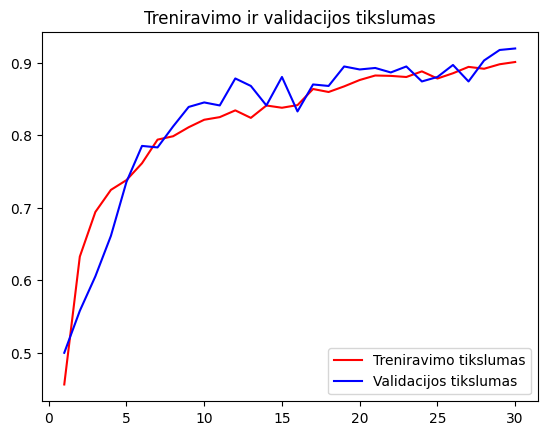

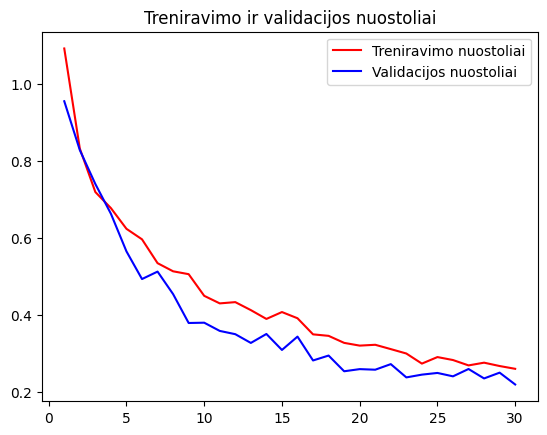

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_0.h5


<ipython-input-23-eadf520904ae>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 6s 194ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.96      0.83      0.89       203
   pneumonia       0.91      0.95      0.93       139
     regular       0.88      0.95      0.91       263

    accuracy                           0.91       605
   macro avg       0.92      0.91      0.91       605
weighted avg       0.91      0.91      0.91       605

Accuracy: 0.9090909090909091
Specificity for covid: 0.98
Specificity for pneumonia: 0.97
Specificity for regular: 0.90
Macro-average Specificity: 0.95


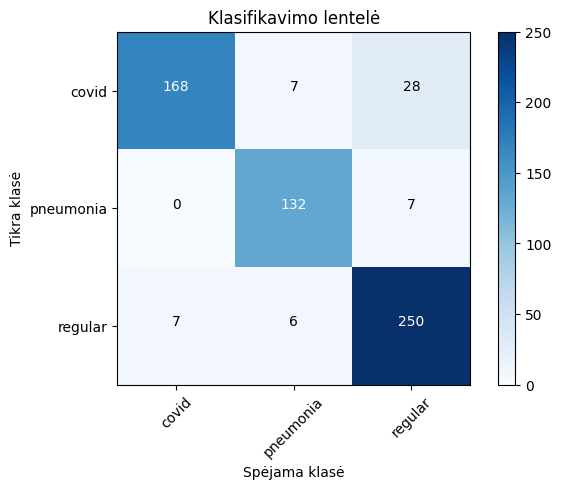

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 51s 641ms/step - loss: 1.1042 - accuracy: 0.4615 - auc_1: 0.6360 - val_loss: 0.9307 - val_accuracy: 0.5289 - val_auc_1: 0.7444
Epoch 2/30
61/61 [==============================] - 37s 609ms/step - loss: 0.8376 - accuracy: 0.6491 - auc_1: 0.8146 - val_loss: 0.8782 - val_accuracy: 0.5434 - val_auc_1: 0.7800
Epoch 3/30
61/61 [==============================] - 36s 591ms/step - loss: 0.7252 - accuracy: 0.7075 - auc_1: 0.8638 - val_loss: 0.8080 - val_accuracy: 0.5971 - val_auc_1: 0.8207
Epoch 4/30
61/61 [==============================] - 37s 611ms/step - loss: 0.6473 - accuracy: 0.7421 - auc_1: 0.8909 - val_loss: 0.8156 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

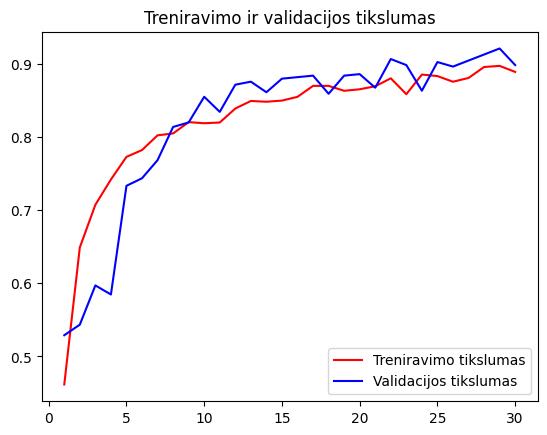

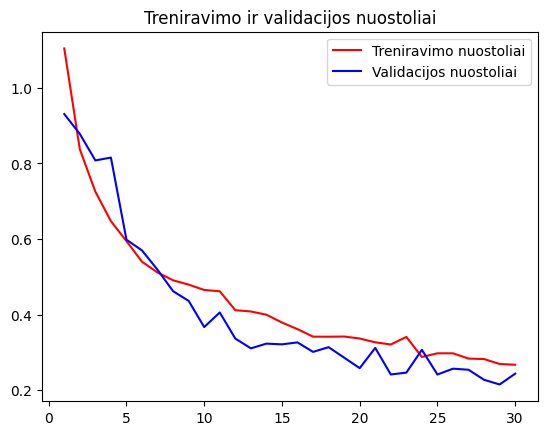

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_1.h5


<ipython-input-23-eadf520904ae>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 5s 109ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.99      0.85      0.91       175
   pneumonia       1.00      0.89      0.94       152
     regular       0.87      1.00      0.93       278

    accuracy                           0.93       605
   macro avg       0.95      0.92      0.93       605
weighted avg       0.94      0.93      0.93       605

Accuracy: 0.9305785123966942
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.88
Macro-average Specificity: 0.96


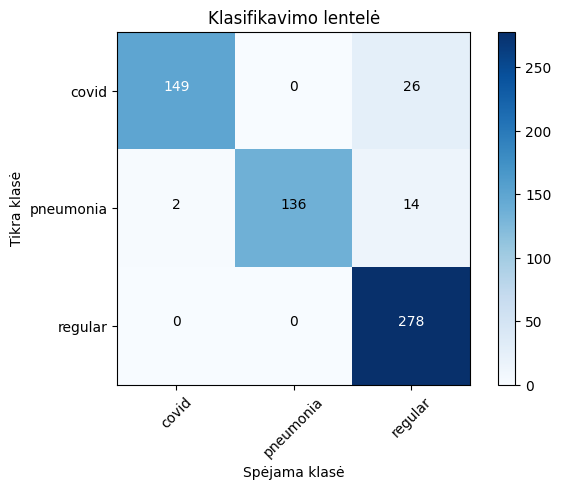

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 50s 611ms/step - loss: 1.0584 - accuracy: 0.4873 - auc_2: 0.6580 - val_loss: 0.9363 - val_accuracy: 0.5269 - val_auc_2: 0.7433
Epoch 2/30
61/61 [==============================] - 39s 636ms/step - loss: 0.8103 - accuracy: 0.6667 - auc_2: 0.8215 - val_loss: 0.8148 - val_accuracy: 0.5640 - val_auc_2: 0.8100
Epoch 3/30
61/61 [==============================] - 39s 646ms/step - loss: 0.6886 - accuracy: 0.7137 - auc_2: 0.8738 - val_loss: 0.7152 - val_accuracy: 0.6364 - val_auc_2: 0.8528
Epoch 4/30
61/61 [==============================] - 37s 602ms/step - loss: 0.6160 - accuracy: 0.7571 - auc_2: 0.9022 - val_loss: 0.5734 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

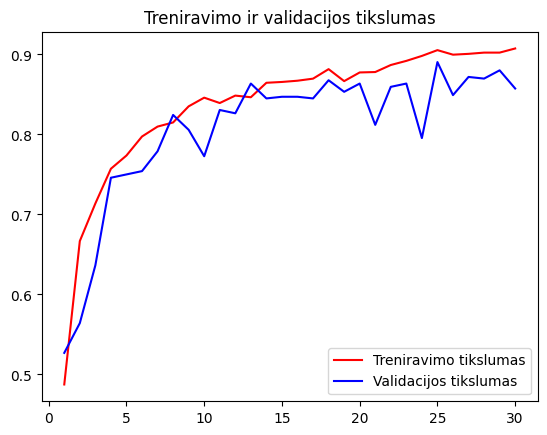

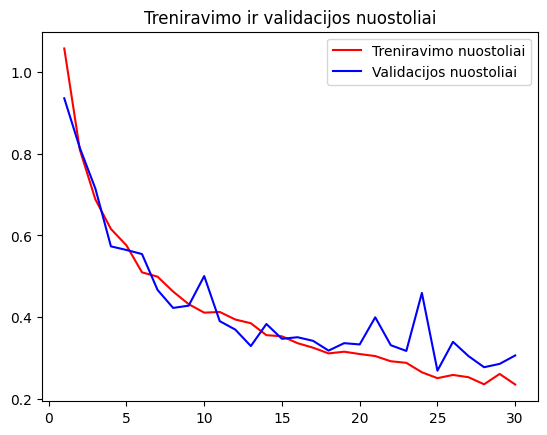

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_2.h5


<ipython-input-23-eadf520904ae>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 90ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.95      0.85      0.90       180
   pneumonia       0.93      0.93      0.93       136
     regular       0.90      0.96      0.92       289

    accuracy                           0.92       605
   macro avg       0.92      0.91      0.92       605
weighted avg       0.92      0.92      0.92       605

Accuracy: 0.9173553719008265
Specificity for covid: 0.98
Specificity for pneumonia: 0.98
Specificity for regular: 0.90
Macro-average Specificity: 0.95


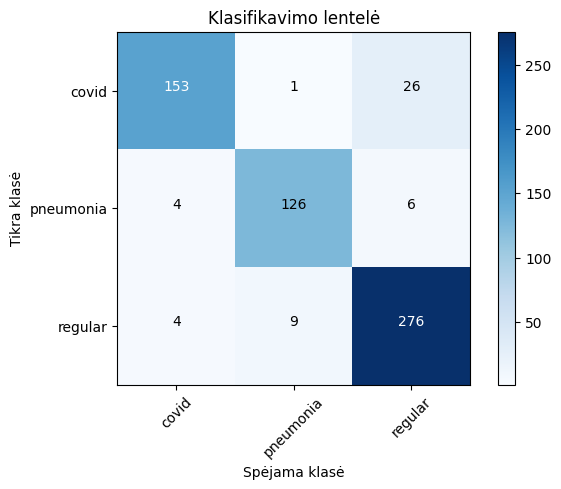

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 51s 637ms/step - loss: 1.0942 - accuracy: 0.4527 - auc_3: 0.6337 - val_loss: 0.9358 - val_accuracy: 0.5806 - val_auc_3: 0.7616
Epoch 2/30
61/61 [==============================] - 37s 608ms/step - loss: 0.8042 - accuracy: 0.6553 - auc_3: 0.8223 - val_loss: 0.8237 - val_accuracy: 0.5640 - val_auc_3: 0.8048
Epoch 3/30
61/61 [==============================] - 37s 600ms/step - loss: 0.7100 - accuracy: 0.7003 - auc_3: 0.8655 - val_loss: 0.7003 - val_accuracy: 0.6591 - val_auc_3: 0.8603
Epoch 4/30
61/61 [==============================] - 37s 608ms/step - loss: 0.6383 - accuracy: 0.7390 - auc_3: 0.8911 - val_loss: 0.6299 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

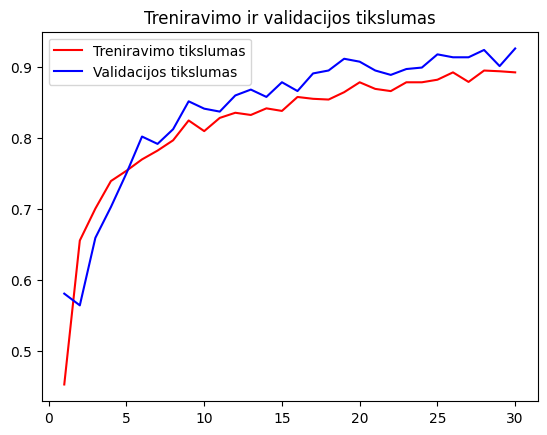

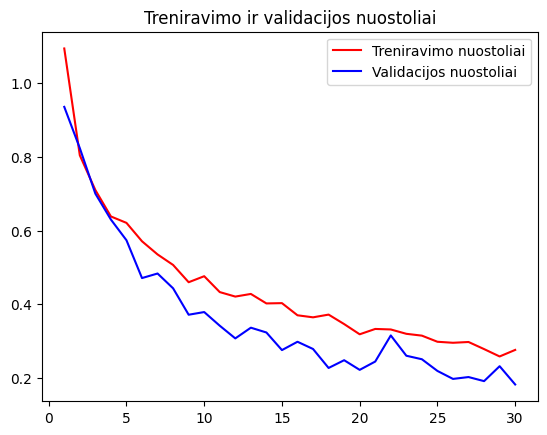

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_3.h5


<ipython-input-23-eadf520904ae>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 86ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.94      0.88      0.91       187
   pneumonia       0.94      0.84      0.89       145
     regular       0.86      0.95      0.90       273

    accuracy                           0.90       605
   macro avg       0.91      0.89      0.90       605
weighted avg       0.90      0.90      0.90       605

Accuracy: 0.9008264462809917
Specificity for covid: 0.97
Specificity for pneumonia: 0.98
Specificity for regular: 0.88
Macro-average Specificity: 0.94


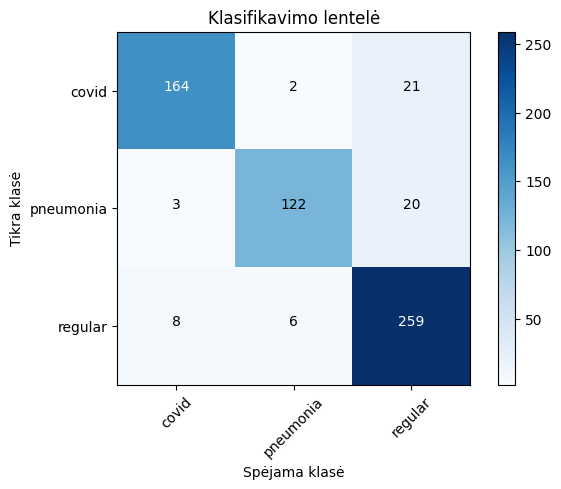

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 51s 641ms/step - loss: 1.0864 - accuracy: 0.4571 - auc_4: 0.6366 - val_loss: 0.9134 - val_accuracy: 0.5950 - val_auc_4: 0.7774
Epoch 2/30
61/61 [==============================] - 39s 635ms/step - loss: 0.8164 - accuracy: 0.6410 - auc_4: 0.8168 - val_loss: 0.7647 - val_accuracy: 0.6343 - val_auc_4: 0.8440
Epoch 3/30
61/61 [==============================] - 37s 609ms/step - loss: 0.7465 - accuracy: 0.6854 - auc_4: 0.8525 - val_loss: 0.6699 - val_accuracy: 0.7045 - val_auc_4: 0.8809
Epoch 4/30
61/61 [==============================] - 38s 609ms/step - loss: 0.6662 - accuracy: 0.7288 - auc_4: 0.8814 - val_loss: 0.6267 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

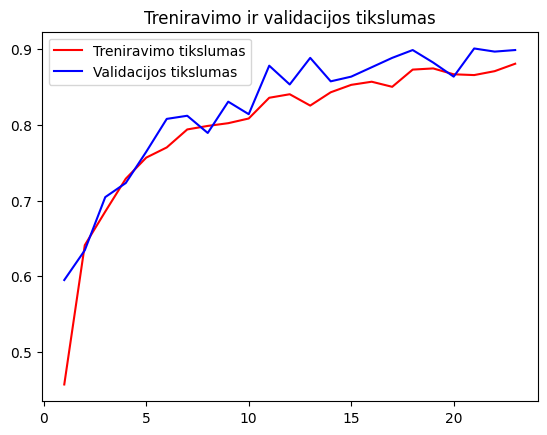

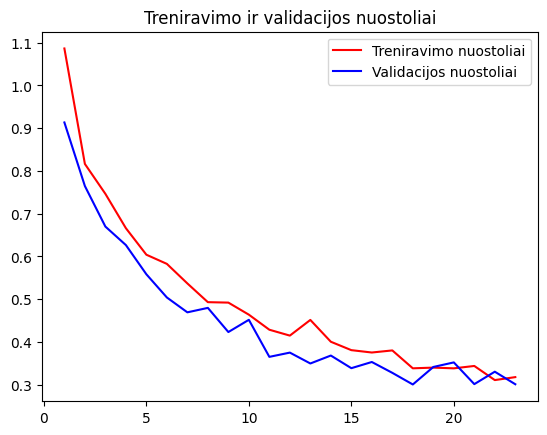

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_4.h5


<ipython-input-23-eadf520904ae>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 160ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.98      0.73      0.84       173
   pneumonia       0.90      0.92      0.91       154
     regular       0.85      0.97      0.90       277

    accuracy                           0.89       604
   macro avg       0.91      0.87      0.88       604
weighted avg       0.90      0.89      0.89       604

Accuracy: 0.8890728476821192
Specificity for covid: 0.99
Specificity for pneumonia: 0.96
Specificity for regular: 0.85
Macro-average Specificity: 0.94


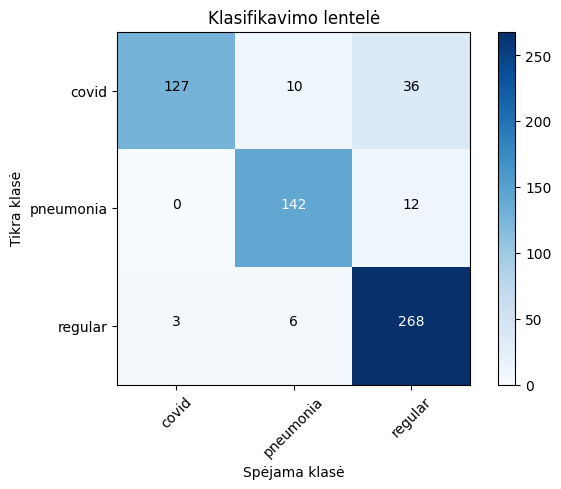

Final Metrics Across All Folds:
Average Accuracy: 0.91 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.96 ± 0.02
Class covid - Average Recall: 0.83 ± 0.05
Class covid - Average F1 Score: 0.89 ± 0.03
Class pneumonia - Average Precision: 0.93 ± 0.04
Class pneumonia - Average Recall: 0.91 ± 0.04
Class pneumonia - Average F1 Score: 0.92 ± 0.02
Class regular - Average Precision: 0.87 ± 0.02
Class regular - Average Recall: 0.96 ± 0.02
Class regular - Average F1 Score: 0.92 ± 0.01


In [23]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.001, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + sgd + 0.001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 52s 619ms/step - loss: 1.8368 - accuracy: 0.5726 - auc_5: 0.7493 - val_loss: 1.1794 - val_accuracy: 0.6550 - val_auc_5: 0.8551
Epoch 2/30
61/61 [==============================] - 39s 641ms/step - loss: 1.1904 - accuracy: 0.7214 - auc_5: 0.8751 - val_loss: 0.8673 - val_accuracy: 0.7438 - val_auc_5: 0.9174
Epoch 3/30
61/61 [==============================] - 39s 643ms/step - loss: 1.0179 - accuracy: 0.7437 - auc_5: 0.8980 - val_loss: 0.8914 - val_accuracy: 0.7211 - val_auc_5: 0.9115
Epoch 4/30
61/61 [==============================] - 36s 592ms/step - loss: 0.8613 - accuracy: 0.7767 - auc_5: 0.9235 - val_loss: 0.6987 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

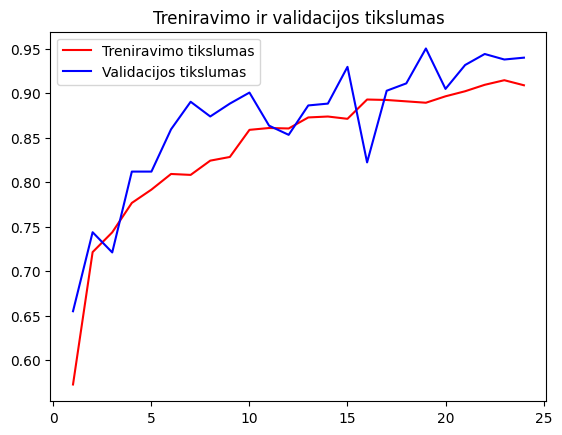

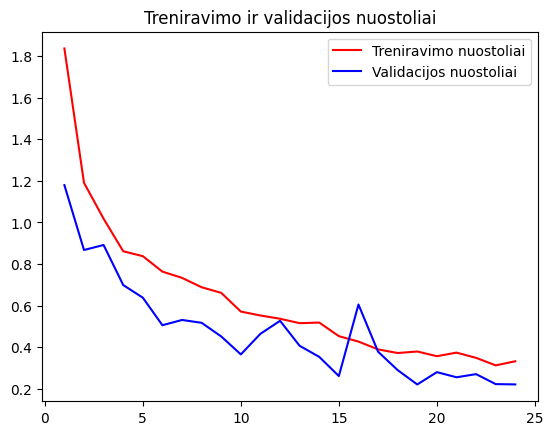

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_0.h5


<ipython-input-24-d4ad4cf9fd93>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 81ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.98      0.86      0.92       203
   pneumonia       0.96      0.92      0.94       139
     regular       0.89      1.00      0.94       263

    accuracy                           0.93       605
   macro avg       0.94      0.93      0.93       605
weighted avg       0.94      0.93      0.93       605

Accuracy: 0.9338842975206612
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.91
Macro-average Specificity: 0.96


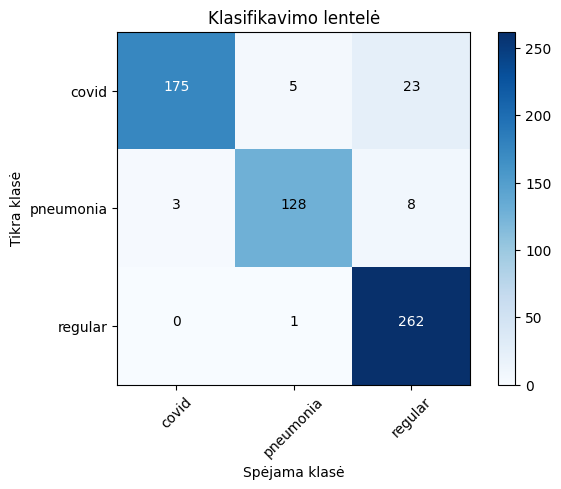

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 50s 627ms/step - loss: 1.9271 - accuracy: 0.5545 - auc_6: 0.7383 - val_loss: 1.2145 - val_accuracy: 0.6921 - val_auc_6: 0.8523
Epoch 2/30
61/61 [==============================] - 39s 646ms/step - loss: 1.2423 - accuracy: 0.6972 - auc_6: 0.8654 - val_loss: 0.9206 - val_accuracy: 0.7521 - val_auc_6: 0.9118
Epoch 3/30
61/61 [==============================] - 39s 634ms/step - loss: 1.0151 - accuracy: 0.7556 - auc_6: 0.9034 - val_loss: 0.7521 - val_accuracy: 0.7975 - val_auc_6: 0.9429
Epoch 4/30
61/61 [==============================] - 39s 632ms/step - loss: 0.9239 - accuracy: 0.7705 - auc_6: 0.9175 - val_loss: 0.6276 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

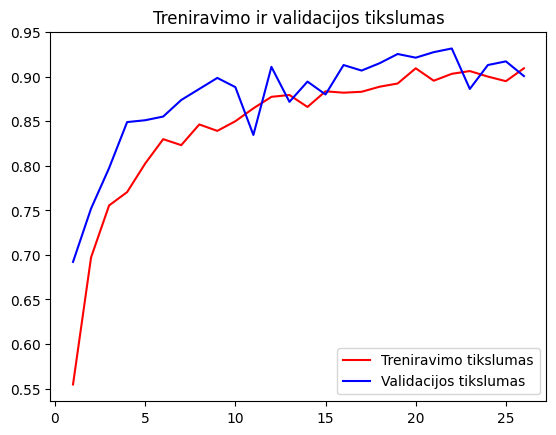

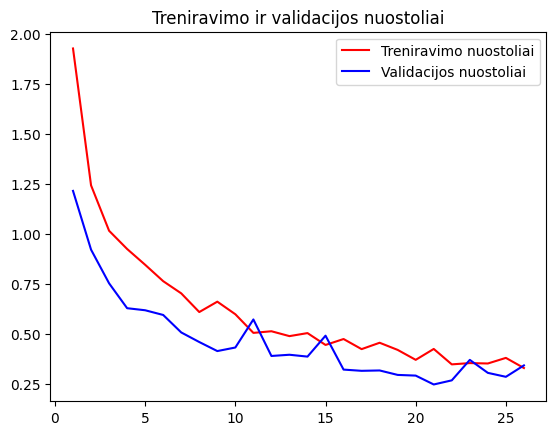

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_1.h5


<ipython-input-24-d4ad4cf9fd93>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 130ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.96      0.93      0.94       175
   pneumonia       0.99      0.86      0.92       152
     regular       0.90      0.99      0.94       278

    accuracy                           0.94       605
   macro avg       0.95      0.92      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9371900826446281
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.91
Macro-average Specificity: 0.96


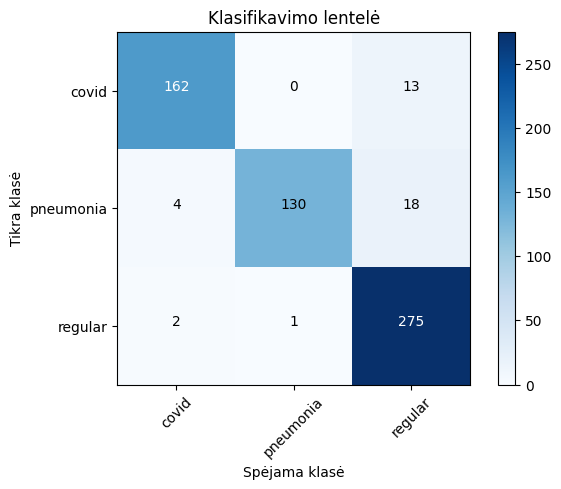

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 52s 648ms/step - loss: 1.8803 - accuracy: 0.5654 - auc_7: 0.7480 - val_loss: 1.2096 - val_accuracy: 0.6942 - val_auc_7: 0.8520
Epoch 2/30
61/61 [==============================] - 37s 610ms/step - loss: 1.1460 - accuracy: 0.7494 - auc_7: 0.8862 - val_loss: 1.1729 - val_accuracy: 0.6921 - val_auc_7: 0.8558
Epoch 3/30
61/61 [==============================] - 38s 613ms/step - loss: 0.9648 - accuracy: 0.7680 - auc_7: 0.9091 - val_loss: 1.1344 - val_accuracy: 0.6798 - val_auc_7: 0.8717
Epoch 4/30
61/61 [==============================] - 37s 612ms/step - loss: 0.8608 - accuracy: 0.7762 - auc_7: 0.9239 - val_loss: 0.9968 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

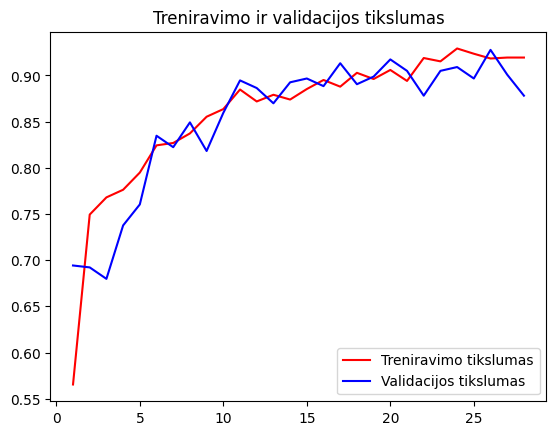

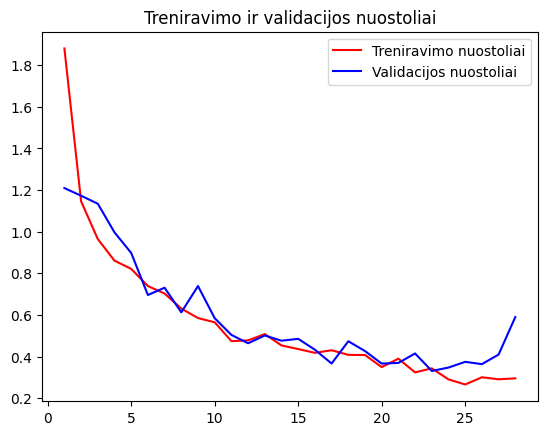

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_2.h5


<ipython-input-24-d4ad4cf9fd93>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 87ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.98      0.88      0.93       180
   pneumonia       0.98      0.90      0.94       136
     regular       0.90      1.00      0.95       289

    accuracy                           0.94       605
   macro avg       0.96      0.92      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9388429752066115
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.90
Macro-average Specificity: 0.96


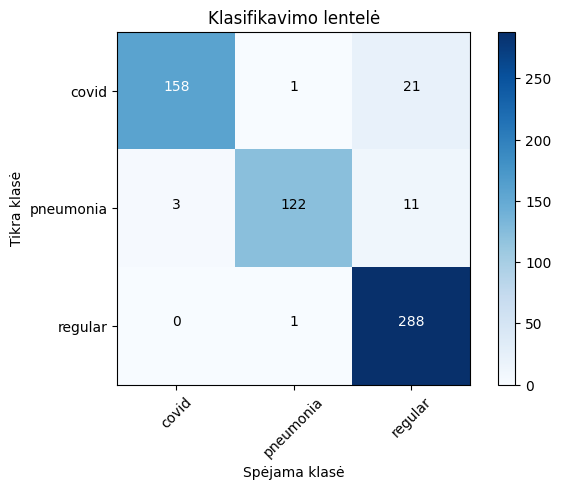

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 54s 671ms/step - loss: 1.9248 - accuracy: 0.5535 - auc_8: 0.7367 - val_loss: 1.1478 - val_accuracy: 0.6736 - val_auc_8: 0.8656
Epoch 2/30
61/61 [==============================] - 39s 646ms/step - loss: 1.2170 - accuracy: 0.7101 - auc_8: 0.8672 - val_loss: 1.0833 - val_accuracy: 0.7107 - val_auc_8: 0.8810
Epoch 3/30
61/61 [==============================] - 38s 617ms/step - loss: 1.0203 - accuracy: 0.7602 - auc_8: 0.9029 - val_loss: 0.6665 - val_accuracy: 0.8471 - val_auc_8: 0.9593
Epoch 4/30
61/61 [==============================] - 39s 644ms/step - loss: 0.9231 - accuracy: 0.7680 - auc_8: 0.9139 - val_loss: 0.7143 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

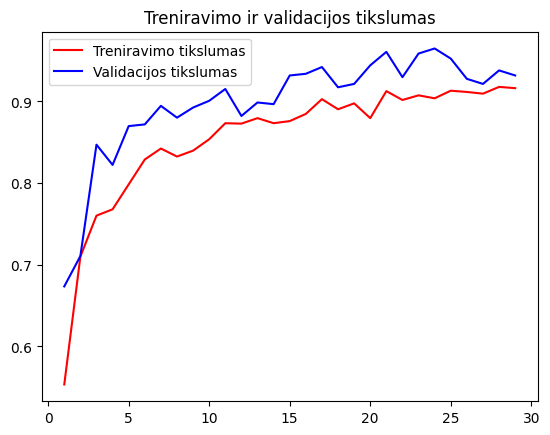

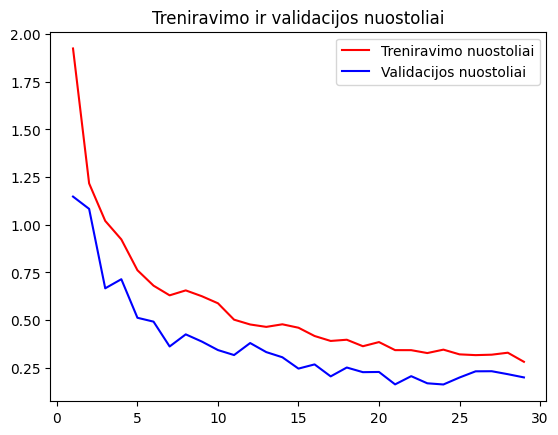

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_3.h5


<ipython-input-24-d4ad4cf9fd93>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 88ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.98      0.92      0.95       187
   pneumonia       0.96      0.93      0.94       145
     regular       0.93      0.98      0.95       273

    accuracy                           0.95       605
   macro avg       0.96      0.94      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.9504132231404959
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.94
Macro-average Specificity: 0.97


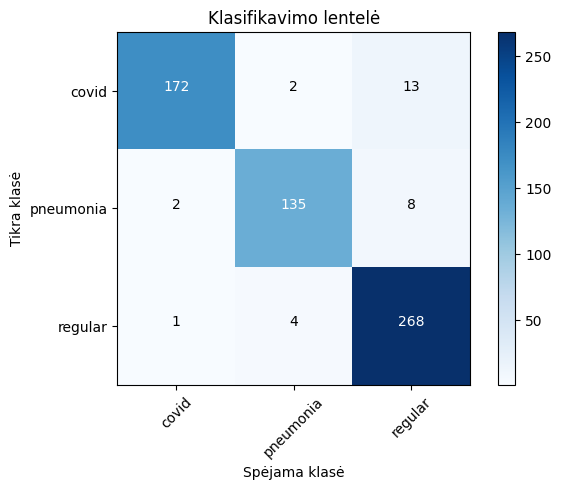

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 53s 624ms/step - loss: 1.8931 - accuracy: 0.5692 - auc_9: 0.7427 - val_loss: 1.2192 - val_accuracy: 0.6364 - val_auc_9: 0.8456
Epoch 2/30
61/61 [==============================] - 40s 650ms/step - loss: 1.1406 - accuracy: 0.7257 - auc_9: 0.8801 - val_loss: 1.1754 - val_accuracy: 0.6839 - val_auc_9: 0.8641
Epoch 3/30
61/61 [==============================] - 39s 636ms/step - loss: 1.0111 - accuracy: 0.7546 - auc_9: 0.9033 - val_loss: 1.0956 - val_accuracy: 0.7293 - val_auc_9: 0.8873
Epoch 4/30
61/61 [==============================] - 37s 607ms/step - loss: 0.8335 - accuracy: 0.7846 - auc_9: 0.9287 - val_loss: 0.9823 - val_accuracy: 

<ipython-input-22-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-22-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-22-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-22-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

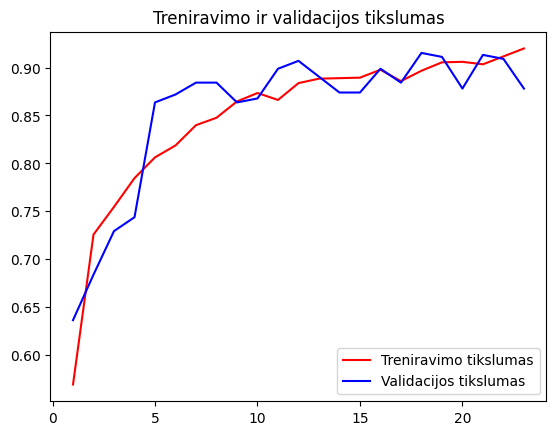

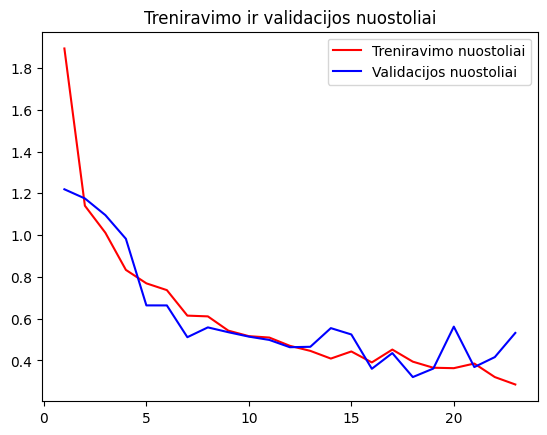

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_4.h5


<ipython-input-24-d4ad4cf9fd93>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 5s 136ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.95      0.87      0.91       173
   pneumonia       0.97      0.92      0.94       154
     regular       0.90      0.97      0.93       277

    accuracy                           0.93       604
   macro avg       0.94      0.92      0.93       604
weighted avg       0.93      0.93      0.93       604

Accuracy: 0.9288079470198676
Specificity for covid: 0.98
Specificity for pneumonia: 0.99
Specificity for regular: 0.91
Macro-average Specificity: 0.96


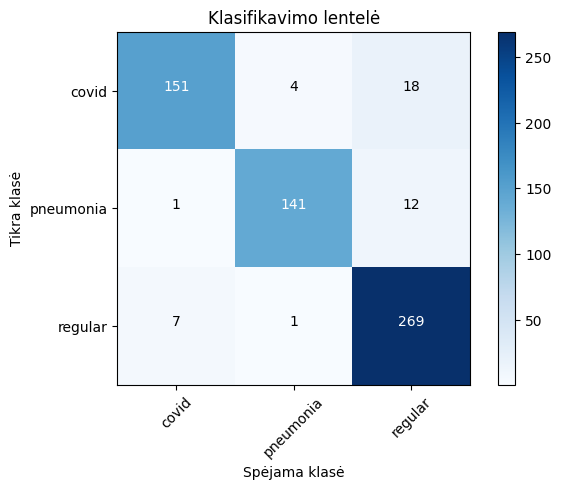

Final Metrics Across All Folds:
Average Accuracy: 0.94 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.97 ± 0.01
Class covid - Average Recall: 0.89 ± 0.03
Class covid - Average F1 Score: 0.93 ± 0.02
Class pneumonia - Average Precision: 0.97 ± 0.01
Class pneumonia - Average Recall: 0.90 ± 0.03
Class pneumonia - Average F1 Score: 0.94 ± 0.01
Class regular - Average Precision: 0.90 ± 0.01
Class regular - Average Recall: 0.99 ± 0.01
Class regular - Average F1 Score: 0.94 ± 0.01


In [24]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.001, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + sgd + 0.01

In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.01, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 69s 762ms/step - loss: 1.3950 - accuracy: 0.7034 - auc_6: 0.8615 - val_loss: 1.1682 - val_accuracy: 0.7128 - val_auc_6: 0.8645
Epoch 2/30
61/61 [==============================] - 46s 752ms/step - loss: 0.7522 - accuracy: 0.8258 - auc_6: 0.9476 - val_loss: 0.6692 - val_accuracy: 0.8182 - val_auc_6: 0.9440
Epoch 3/30
61/61 [==============================] - 47s 748ms/step - loss: 0.5612 - accuracy: 0.8636 - auc_6: 0.9657 - val_loss: 0.5351 - val_accuracy: 0.8409 - val_auc_6: 0.9603
Epoch 4/30
61/61 [==============================] - 37s 598ms/step - loss: 0.4961 - accuracy: 0.8667 - auc_6: 0.9711 - val_loss: 0.6198 - val_accuracy: 